In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


## Importing Libraries

In [60]:
import yfinance as yf
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import scipy.optimize as sci_opt


import warnings 
warnings.filterwarnings(action= 'ignore')

### Get data of following companies from Yahoo Finance using python API
**Starting from FY22**
* AAPL - Apple Inc.
* ADBE - Adobe Inc.
* GOOGL - Alphabet Inc. (Google)
* IBM - International Business Machines Corporation
* JNJ - Johnson & Johnson
* KO - The Coca-Cola Company
* NFLX - Netflix, Inc.
* AMZN - Amazon.com, Inc.
* NKE - Nike, Inc.
* MSFT - Microsoft Corporation

In [3]:
ticker_list = ['AAPL', 'ADBE', 'GOOGL', 'IBM', 'JNJ', 'KO', 'NFLX', 'AMZN', 'NKE', 'MSFT']
dfs = []

start_date = '2022-04-01'

for ticker in ticker_list:
    data = yf.download(ticker, start=start_date)
    data['Symbol'] = ticker
    data.reset_index(inplace=True)    
    dfs.append(data)
    
stock_data = pd.concat(dfs, ignore_index=True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
display(stock_data)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2022-04-01,174.029999,174.880005,171.940002,174.309998,172.560471,78751300,AAPL
1,2022-04-04,174.570007,178.490005,174.440002,178.440002,176.648987,76468400,AAPL
2,2022-04-05,177.500000,178.300003,174.419998,175.059998,173.302933,73401800,AAPL
3,2022-04-06,172.360001,173.630005,170.130005,171.830002,170.105331,89058800,AAPL
4,2022-04-07,171.160004,173.360001,169.850006,172.139999,170.412231,77594700,AAPL
...,...,...,...,...,...,...,...,...
4175,2023-11-22,378.000000,379.790009,374.970001,377.850006,377.850006,23345300,MSFT
4176,2023-11-24,377.329987,377.970001,375.140015,377.429993,377.429993,10176600,MSFT
4177,2023-11-27,376.779999,380.640015,376.200012,378.609985,378.609985,22179200,MSFT
4178,2023-11-28,378.350006,383.000000,378.160004,382.700012,382.700012,20453100,MSFT


In [5]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4180 non-null   datetime64[ns]
 1   Open       4180 non-null   float64       
 2   High       4180 non-null   float64       
 3   Low        4180 non-null   float64       
 4   Close      4180 non-null   float64       
 5   Adj Close  4180 non-null   float64       
 6   Volume     4180 non-null   int64         
 7   Symbol     4180 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 261.4+ KB


In [6]:
number_of_symbols = len(stock_data['Symbol'].unique())
number_of_symbols

10

### Setting up Data

In [7]:
price_data = stock_data.pivot(index='Date', columns='Symbol', values='Close')

In [8]:
display(price_data)

Symbol,AAPL,ADBE,AMZN,GOOGL,IBM,JNJ,KO,MSFT,NFLX,NKE
Date,,,,,,,,,,
2022-04-01,174.309998,458.190002,163.559998,140.150497,130.149994,178.190002,62.869999,309.420013,373.470001,133.520004
2022-04-04,178.440002,468.809998,168.346497,142.971497,130.270004,176.470001,62.540001,314.970001,391.500000,134.339996
2022-04-05,175.059998,458.579987,164.054993,140.591003,128.889999,177.610001,62.470001,310.880005,380.149994,132.300003
2022-04-06,171.830002,444.329987,158.755997,136.548004,129.389999,182.229996,63.099998,299.500000,368.350006,128.360001
2022-04-07,172.139999,452.720001,157.784500,135.888504,128.550003,181.759995,63.439999,301.369995,362.149994,129.380005
...,...,...,...,...,...,...,...,...,...,...
2023-11-22,191.309998,619.719971,146.710007,138.490005,155.130005,150.820007,58.419998,377.850006,478.000000,107.919998
2023-11-24,189.970001,619.429993,146.740005,136.690002,155.179993,152.500000,58.570000,377.429993,479.559998,107.639999
2023-11-27,189.789993,619.270020,147.729996,136.410004,155.570007,151.279999,58.459999,378.609985,479.170013,107.959999


## Calculate Sharpe Ratio
The Sharpe ratio compares the return of an investment with its risk. It's a mathematical expression of the insight that excess returns over a period of time may signify more volatility and risk, rather than investing skill.

$$  Sharpe Ratio =  \frac {Rp - Rf} {\sigma p}   $$

Where: 
* Rp = Return of Portfolio (expected)
* Rf = Risk-Free Rate
* $\sigma$p = Standard Deviation of the Portfolio’s Excess Return


$$$$

**Expected Return:**
<div style="text-align: center;">
  \( R_p = ( w_{1}r_{1} + w_{2}r_{2} + \ldots +  w_{n}r_{n} ) \)
</div>

Where:
* $r_i$ = Return of Security i
* $w_i$ = Weight of Security i

$$$$

**Standard Deviation of the Portfolio**
$$ \sigma p = \sqrt{\sum{(w_i^2 \cdot \sigma_i^2) + (w_j^2 \cdot \sigma_j^2)} + 2 \sum{(w_i \cdot w_j \cdot \rho_{ij} \cdot \sigma_i \cdot \sigma_j)}}
$$

Where:

- w<sub>i</sub> is the weight of asset `i` in the portfolio.
- $\sigma_i$ is the standard deviation of asset `i`.
- $\rho_{ij}$ is the correlation coefficient between assets `i` and `j`.
- The first summation term calculates the contribution of each asset's risk to the portfolio.
- The second summation term considers the covariance between asset pairs `i` and `j` and their weights.


In [9]:
# Calculate the Log of returns.
log_return = np.log(1 + price_data.pct_change())

# Generate Random Weights.
random_weights = np.array(np.random.random(number_of_symbols))

# Generate the Rebalance Weights, these should equal 1.
rebalance_weights = random_weights / np.sum(random_weights)

# Calculate the Expected Returns, annualize it by multiplying it by `252`.
exp_ret = np.sum((log_return.mean() * rebalance_weights) * 252)

# Calculate the Expected Volatility, annualize it by multiplying it by `252`.
exp_vol = np.sqrt(
                    np.dot(
                            rebalance_weights.T,
                            np.dot(
                                    log_return.cov() * 252,
                                    rebalance_weights
                                   )
                            )
)

# Calculate the Sharpe Ratio.
sharpe_ratio = exp_ret / exp_vol

## Monte Carlo Simulation (single interation)

In [10]:
# Put the weights into a data frame to see them better.
weights_df = pd.DataFrame(data={
                                'random_weights': random_weights,
                                'rebalance_weights': rebalance_weights
                                }
                         )


print('')
print('*'*80)
print('PORTFOLIO WEIGHTS:')
print('-'*80)
print(weights_df)
print('-'*80)

# Do the same with the other metrics.
metrics_df = pd.DataFrame(data={
    'Expected Portfolio Returns': exp_ret,
    'Expected Portfolio Volatility': exp_vol,
    'Portfolio Sharpe Ratio': sharpe_ratio
}, index=[0])

print('')
print('*'*80)
print('PORTFOLIO METRICS:')
print('-'*80)
print(metrics_df)
print('-'*80)


********************************************************************************
PORTFOLIO WEIGHTS:
--------------------------------------------------------------------------------
   random_weights  rebalance_weights
0        0.205677           0.067750
1        0.315753           0.104009
2        0.196351           0.064678
3        0.027911           0.009194
4        0.245173           0.080760
5        0.884556           0.291373
6        0.455499           0.150041
7        0.206275           0.067947
8        0.271257           0.089352
9        0.227373           0.074897
--------------------------------------------------------------------------------

********************************************************************************
PORTFOLIO METRICS:
--------------------------------------------------------------------------------
   Expected Portfolio Returns  Expected Portfolio Volatility  \
0                    0.004657                        0.19033   

   Portfolio Sharpe

## Portfolio Optimization Process

In [74]:
# Initialize the components, to run a Monte Carlo Simulation.

# We will run 5000 iterations.
num_of_portfolios = 100000

# Prep an array to store the weights as they are generated, 5000 iterations for each of our 4 symbols.
all_weights = np.zeros((num_of_portfolios, number_of_symbols))

# Prep an array to store the returns as they are generated, 5000 possible return values.
ret_arr = np.zeros(num_of_portfolios)

# Prep an array to store the volatilities as they are generated, 5000 possible volatility values.
vol_arr = np.zeros(num_of_portfolios)

# Prep an array to store the sharpe ratios as they are generated, 5000 possible Sharpe Ratios.
sharpe_arr = np.zeros(num_of_portfolios)

# Start the simulations.
for ind in range(num_of_portfolios):

    # First, calculate the weights.
    weights = np.array(np.random.random(number_of_symbols))
    weights = weights / np.sum(weights)

    # Add the weights, to the `weights_arrays`.
    all_weights[ind, :] = weights

    # Calculate the expected log returns, and add them to the `returns_array`.
    ret_arr[ind] = np.sum((log_return.mean() * weights) * 252)

    # Calculate the volatility, and add them to the `volatility_array`.
    vol_arr[ind] = np.sqrt(
        np.dot(weights.T, np.dot(log_return.cov() * 252, weights))
    )

    # Calculate the Sharpe Ratio and Add it to the `sharpe_ratio_array`.
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

# Let's create our "Master Data Frame", with the weights, the returns, the volatility, and the Sharpe Ratio
simulations_data = [ret_arr, vol_arr, sharpe_arr, all_weights]

# Create a DataFrame from it, then Transpose it so it looks like our original one.
simulations_df = pd.DataFrame(data=simulations_data).T

# Give the columns the Proper Names.
simulations_df.columns = [
    'Returns',
    'Volatility',
    'Sharpe Ratio',
    'Portfolio Weights'
]

# Make sure the data types are correct, we don't want our floats to be strings.
simulations_df = simulations_df.infer_objects()

# Print out the results.
print('')
print('='*80)
print('SIMULATIONS RESULT:')
print('-'*80)
print(simulations_df.head())
print('-'*80)


SIMULATIONS RESULT:
--------------------------------------------------------------------------------
    Returns  Volatility  Sharpe Ratio  \
0  0.059420    0.280638      0.211733   
1  0.037238    0.189225      0.196794   
2  0.050424    0.234178      0.215325   
3  0.041109    0.235519      0.174546   
4  0.027582    0.215819      0.127801   

                                   Portfolio Weights  
0  [0.09236564873116937, 0.1566933243342443, 0.14...  
1  [0.17712396893125923, 0.05145777200191415, 0.0...  
2  [0.16030693036598953, 0.0818761939712454, 0.06...  
3  [0.05538373214999382, 0.19976885754303306, 0.1...  
4  [0.0986111850550491, 0.19468912210005554, 0.00...  
--------------------------------------------------------------------------------


In [75]:
display(simulations_df)

,Returns,Volatility,Sharpe Ratio,Portfolio Weights
0,0.059420,0.280638,0.211733,"[0.09236564873116937, 0.1566933243342443, 0.14..."
1,0.037238,0.189225,0.196794,"[0.17712396893125923, 0.05145777200191415, 0.0..."
2,0.050424,0.234178,0.215325,"[0.16030693036598953, 0.0818761939712454, 0.06..."
3,0.041109,0.235519,0.174546,"[0.05538373214999382, 0.19976885754303306, 0.1..."
4,0.027582,0.215819,0.127801,"[0.0986111850550491, 0.19468912210005554, 0.00..."
...,...,...,...,...
99995,0.039996,0.234001,0.170921,"[0.103334732527258, 0.14477545348815712, 0.120..."
99996,0.023713,0.240879,0.098443,"[0.11465512154899055, 0.06534708531338528, 0.0..."
99997,0.028955,0.250040,0.115800,"[0.13515150116038896, 0.01885521534128674, 0.0..."
99998,0.022632,0.234582,0.096480,"[0.034004137775321644, 0.14140814809837507, 0...."


## Result Metrics

In [76]:
# Return the Max Sharpe Ratio from the run.
max_sharpe_ratio = simulations_df.loc[simulations_df['Sharpe Ratio'].idxmax()]
max_sharpe_ratio['Portfolio Weights'] = np.round(max_sharpe_ratio['Portfolio Weights'],3)

# Return the Min Volatility from the run.
min_volatility = simulations_df.loc[simulations_df['Volatility'].idxmin()]

print('')
print('='*80)
print('MAX SHARPE RATIO:')
print('-'*80)
print(max_sharpe_ratio)
print('-'*80)

print('')
print('='*80)
print('MIN VOLATILITY:')
print('-'*80)
print(min_volatility)
print('-'*80)


MAX SHARPE RATIO:
--------------------------------------------------------------------------------
Returns                                                       0.114038
Volatility                                                    0.266517
Sharpe Ratio                                                  0.427882
Portfolio Weights    [0.032, 0.24, 0.012, 0.038, 0.252, 0.015, 0.02...
Name: 9801, dtype: object
--------------------------------------------------------------------------------

MIN VOLATILITY:
--------------------------------------------------------------------------------
Returns                                                      -0.006811
Volatility                                                     0.16118
Sharpe Ratio                                                 -0.042255
Portfolio Weights    [0.06374845908724418, 0.04311072894106255, 0.0...
Name: 24163, dtype: object
--------------------------------------------------------------------------------


## Plotting RETURN vs RISK

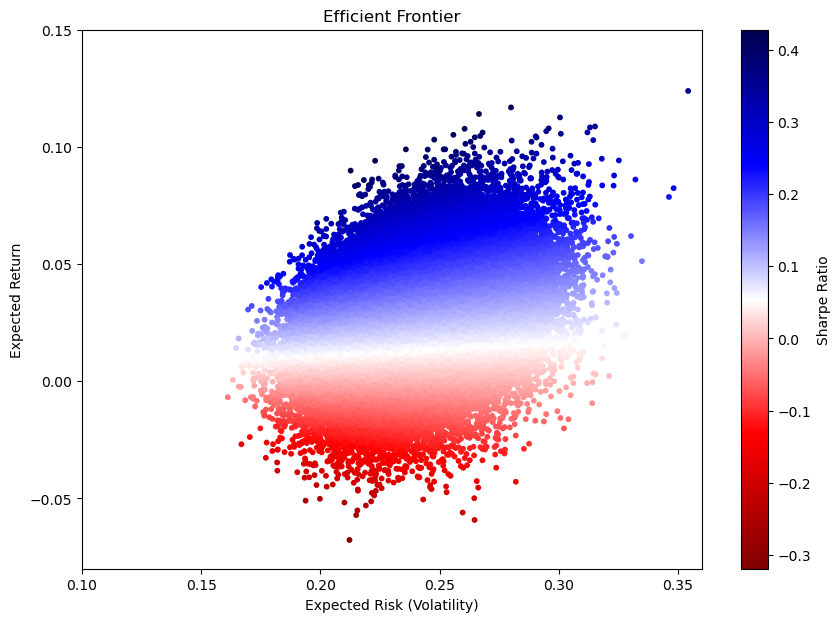

In [101]:
plt.figure(figsize=(10,7))

plt.scatter(simulations_df['Volatility'], 
            simulations_df['Returns'], 
            c=simulations_df['Sharpe Ratio'], 
            cmap='seismic_r', marker='o', s=10)

plt.title('Efficient Frontier')
plt.xlabel('Expected Risk (Volatility)')
plt.ylabel('Expected Return')

plt.xlim(0.1,0.36)
plt.ylim(-0.08,0.15)

plt.colorbar(label='Sharpe Ratio')
plt.show()

In [37]:
max_sharpe_ratio['Portfolio Weights'] = np.round(max_sharpe_ratio['Portfolio Weights'],3)
max_sharpe_ratio['Portfolio Weights']

array([0.025, 0.229, 0.002, 0.016, 0.25 , 0.005, 0.037, 0.167, 0.238,
       0.03 ])

In [38]:
itr = 0

for ticker in ticker_list:
    max_sharpe_ratio[ticker] = max_sharpe_ratio['Portfolio Weights'][itr]
    itr += 1
    
max_sharpe_ratio.drop('Portfolio Weights', inplace=True)

In [39]:
max_sharpe_ratio

Returns         0.119836
Volatility      0.267343
Sharpe Ratio    0.448246
AAPL               0.025
ADBE               0.229
GOOGL              0.002
IBM                0.016
JNJ                 0.25
KO                 0.005
NFLX               0.037
AMZN               0.167
NKE                0.238
MSFT                0.03
Name: 31480, dtype: object

In [40]:
df = max_sharpe_ratio.to_frame(name='Values').T
df

,Returns,Volatility,Sharpe Ratio,AAPL,ADBE,GOOGL,IBM,JNJ,KO,NFLX,AMZN,NKE,MSFT
Values,0.119836,0.267343,0.448246,0.025,0.229,0.002,0.016,0.25,0.005,0.037,0.167,0.238,0.03


In [41]:
monte_carlo_distribution = pd.DataFrame()

for ticker in ticker_list:
    monte_carlo_distribution[ticker] = df[ticker]
    
monte_carlo_distribution

,AAPL,ADBE,GOOGL,IBM,JNJ,KO,NFLX,AMZN,NKE,MSFT
Values,0.025,0.229,0.002,0.016,0.25,0.005,0.037,0.167,0.238,0.03


# Optimization

### Overview:
* With a given set of weights, return the portfolio returns, the portfolio volatility, and the portfolio sharpe ratio.

    ### Arguments:
    * weights (list): An array of portfolio weights.

    ### Returns:
    * (np.array): An array containg return value, a volatility value, and a sharpe ratio.

In [42]:
def get_metrics(weights: list) -> np.array:

    # Convert to a Numpy Array.
    weights = np.array(weights)

    # Calculate the returns, remember to annualize them (252).
    ret = np.sum(log_return.mean() * weights) * 252

    # Calculate the volatility, remember to annualize them (252).
    vol = np.sqrt(
        np.dot(weights.T, np.dot(log_return.cov() * 252, weights))
    )

    # Calculate the Sharpe Ratio.
    sr = ret / vol

    return np.array([ret, vol, sr])    

### grab_negative_sharpe 
* function used to minimize the Sharpe Ratio.

    ### Arguments:
    * weights (list): The weights, we are testing to see if it's the minimum.

    ### Returns:
    * (np.array): An numpy array of the portfolio metrics.


In [43]:
def grab_negative_sharpe(weights: list) -> np.array:
    return get_metrics(weights)[2] - 1

### grab_volatility
* The function used to minimize the Sharpe Ratio.

    ### Arguments:

    * weights (list): The weights, we are testing to see if it's the minimum.

    ### Returns:
    * (np.array): An numpy array of the portfolio metrics.

In [44]:
def grab_volatility(weights: list) -> np.array:
    return get_metrics(weights)[1]

### check_sum
* Ensure the allocations of the "weights", sums to 1 (100%)

    ### Arguments:
    * weights (list): The weights we want to check to see if they sum to 1.

    ### Returns:
    * float: The different between 1 and the sum of the weights.

In [45]:
def check_sum(weights: list) -> float:
    return np.sum(weights) - 1

Till now our functions defined, let's run the optimization using the **scipy.optimization module**. This module has a function called minimize which we can use to help our optimial values. 
However, we need to do a few things before we run it. 
* First, we need to define bounds which tells the minimize function that each of our positions can only be between 0% and 100% of the allocation.
* Second, we need to define the constraint which will be a starting(function) that ensures we equ(equal) a 100% allocated portfolio. In other words, we use all the "capital" we can. 
* Third, we need to define our initial guess of the weights. The initial guess can be anything but in this case let's make it easy and start with an equally distirbuted portofolio. 
In this case we have 10 symbols so each symbol will be 10% of the portfolio.

Once we've define this steps we can run the optimization by passing through the arguments defined and defining the method as **Sequential Least Squares Programming (SLSQP)**. 
Once we run the minimize method we can grab the results.

The first is the results of our minimization operation. Inside the results, you'll see the optimize sharpe ration defined by the starting value. We can then take the optimized_weights defined by the optimized_sharpe.x values, and use them to return the different metrics we have for our portfolio.

## Optimize Sharpe Ratio

In [46]:
# Define the boundaries for each symbol, i.e from 0% to 100%
bounds = tuple((0, 1) for symbol in range(number_of_symbols))

# Define the constraints, That the sum of all weight must not exceed 100%.
constraints = ({'type': 'eq', 'fun': check_sum})

# Need to create an initial guess to start with, 
#And what's better than even distribution i.e. 10% of for each 10 stocks
init_guess = number_of_symbols * [1 / number_of_symbols]

# Perform the operation to minimize the risk.
optimized_sharpe = sci_opt.minimize(
    grab_negative_sharpe, # minimize this.
    init_guess, # Start with these values.
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# Print the results.
print('')
print('='*80)
print('OPTIMIZED SHARPE RATIO:')
print('-'*80)
print(optimized_sharpe)
print('-'*80)


OPTIMIZED SHARPE RATIO:
--------------------------------------------------------------------------------
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.6049314055016173
       x: [ 2.163e-14  3.005e-14  1.163e-13  2.251e-14  1.224e-14
            8.496e-01  5.623e-15  2.435e-14  3.348e-14  1.504e-01]
     nit: 7
     jac: [ 7.987e-01  1.577e+00  1.197e-01  3.392e-01  1.025e+00
            2.265e-04  6.338e-02  1.182e+00  1.416e+00 -1.280e-03]
    nfev: 77
    njev: 7
--------------------------------------------------------------------------------


In [47]:
optimized_sharpe_values = np.round(optimized_sharpe.x,3)
optimized_sharpe_distribution = pd.DataFrame([optimized_sharpe_values], columns=ticker_list)


optimized_metrics_values = get_metrics(weights=optimized_sharpe.x)
optimized_metrics = pd.DataFrame([optimized_metrics_values], columns=['Return', 'Volatility', 'Sharpe Ratio'])


# Print the Optimized Weights.
print('='*80)
print('OPTIMIZED WEIGHTS:')
display(optimized_sharpe_distribution)
print("")

# Print the Optimized Metrics.
print('='*80)
print('OPTIMIZED METRICS:')
display(optimized_metrics)

OPTIMIZED WEIGHTS:


,AAPL,ADBE,GOOGL,IBM,JNJ,KO,NFLX,AMZN,NKE,MSFT
0,0.0,0.0,0.0,0.0,0.0,0.85,0.0,0.0,0.0,0.15



OPTIMIZED METRICS:


,Return,Volatility,Sharpe Ratio
0,-0.098554,0.162918,-0.604931


## Optimize Volatility Ratio

In [48]:
# Define the boundaries for each symbol. Remember I can only invest up to 100% of my capital into a single asset.
bounds = tuple((0, 1) for symbol in range(number_of_symbols))

# Define the constraints, here I'm saying that the sum of each weight must not exceed 100%.
constraints = ({'type': 'eq', 'fun': check_sum})

# We need to create an initial guess to start with,
# and usually the best initial guess is just an
# even distribution. In this case 25% for each of the 4 stocks.
init_guess = number_of_symbols * [1 / number_of_symbols]

# Perform the operation to minimize the risk.
optimized_volatility = sci_opt.minimize(
    grab_volatility, # minimize this.
    init_guess, # Start with these values.
    method='SLSQP',
    bounds=bounds, # don't exceed these bounds.
    constraints=constraints # make sure you don't exceed the 100% constraint.
)

# Print the results.
print('')
print('='*80)
print('OPTIMIZED VOLATILITY RATIO:')
print('-'*80)
print(optimized_volatility)
print('-'*80)


OPTIMIZED VOLATILITY RATIO:
--------------------------------------------------------------------------------
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.13935427181814
       x: [ 0.000e+00  1.033e-17  0.000e+00  5.705e-03  1.771e-01
            4.277e-01  3.586e-01  1.365e-02  1.726e-02  0.000e+00]
     nit: 8
     jac: [ 1.545e-01  1.524e-01  1.591e-01  1.398e-01  1.394e-01
            1.395e-01  1.392e-01  1.390e-01  1.386e-01  1.627e-01]
    nfev: 89
    njev: 8
--------------------------------------------------------------------------------


In [49]:
optimized_volatility_values = np.round(optimized_volatility.x,3)
optimized_volatility_distribution = pd.DataFrame([optimized_volatility_values], columns=ticker_list)

optimized_metrics_values = get_metrics(weights=optimized_volatility.x)
optimized_metrics = pd.DataFrame([optimized_metrics_values], columns=['Return', 'Volatility', 'Sharpe Ratio'])


# Print the Optimized Weights.
print('='*80)
print('OPTIMIZED WEIGHTS:')
display(optimized_volatility_distribution)
print("")


# Print the Optimized Metrics.
print('='*80)
print('OPTIMIZED METRICS:')
display(optimized_metrics)

OPTIMIZED WEIGHTS:


,AAPL,ADBE,GOOGL,IBM,JNJ,KO,NFLX,AMZN,NKE,MSFT
0,0.0,0.0,0.0,0.006,0.177,0.428,0.359,0.014,0.017,0.0



OPTIMIZED METRICS:


,Return,Volatility,Sharpe Ratio
0,-0.033747,0.139354,-0.242169


# Final Results

In [50]:
amount = 50000

## 1. Monte Carlo Distribution

In [51]:
monte_carlo_amount_distribution = monte_carlo_distribution * amount
monte_carlo_amount_distribution

,AAPL,ADBE,GOOGL,IBM,JNJ,KO,NFLX,AMZN,NKE,MSFT
Values,1250.0,11450.0,100.0,800.0,12500.0,250.0,1850.0,8350.0,11900.0,1500.0


## Optimized Sharpe Ratio

In [52]:
optimized_sharpe_amount_distribution = optimized_sharpe_distribution * amount
optimized_sharpe_amount_distribution

,AAPL,ADBE,GOOGL,IBM,JNJ,KO,NFLX,AMZN,NKE,MSFT
0,0.0,0.0,0.0,0.0,0.0,42500.0,0.0,0.0,0.0,7500.0


## Optimized Volatility

In [53]:
optimized_volatility_distribution
optimized_volatility_amount_distribution = optimized_volatility_distribution * amount
optimized_volatility_amount_distribution

,AAPL,ADBE,GOOGL,IBM,JNJ,KO,NFLX,AMZN,NKE,MSFT
0,0.0,0.0,0.0,300.0,8850.0,21400.0,17950.0,700.0,850.0,0.0


### Monte carlo Distribution gives better distribution

## Convert to Pickle

In [54]:
import pickle

In [55]:
pickle.dump(monte_carlo_distribution, open('final_allocation.pkl','wb'))

In [56]:
logo_list = ['apple', 'adobe', 'google','ibm', 'jnj', 'ko', 'netflix', 'amazon', 'nike', 'microsoft']
pickle.dump(logo_list, open('logo_list.pkl','wb'))